In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [145]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
df = df.drop(['PassengerId','Name','Ticket','Fare', 'Cabin'], axis = 1)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [147]:
df.dropna(inplace=True)

In [148]:
df['Embarked'].isnull().sum()

0

In [149]:
df.replace({'Embarked':{'C':0,'S':1,'Q':2,}},inplace=True)
df.replace({'Sex':{'male':1,'female':0}},inplace=True)
df['total_fam'] = df['SibSp'] + df['Parch']
df.head()
df = df.drop(['SibSp','Parch'], axis =1 )


In [150]:
X = np.array(df.drop(["Survived"], axis=1))
y = np.array(df["Survived"])

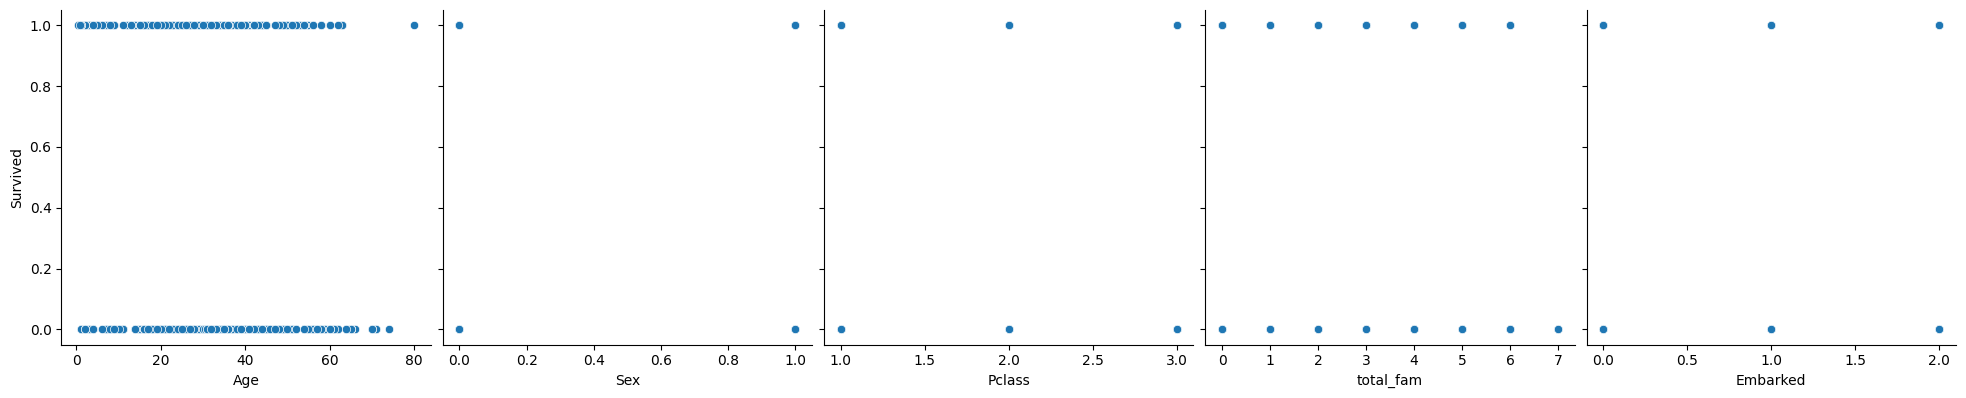

In [151]:
sns.pairplot(df, x_vars=['Age', 'Sex', 'Pclass', 'total_fam', 'Embarked',], y_vars='Survived', height=4, aspect=1, kind='scatter')

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

In [153]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
rfc.score(X_test,y_test)

0.7696629213483146

In [155]:
cb = CatBoostClassifier(
    iterations = 100,
    diffusion_temperature= 0.7,
    learning_rate = 0.0085
)
cb.fit(X_train,y_train)

0:	learn: 0.6898648	total: 1.05ms	remaining: 104ms
1:	learn: 0.6871157	total: 1.52ms	remaining: 74.4ms
2:	learn: 0.6836336	total: 1.74ms	remaining: 56.4ms
3:	learn: 0.6824083	total: 2.13ms	remaining: 51.1ms
4:	learn: 0.6811547	total: 2.46ms	remaining: 46.7ms
5:	learn: 0.6785227	total: 2.56ms	remaining: 40.1ms
6:	learn: 0.6778170	total: 2.85ms	remaining: 37.9ms
7:	learn: 0.6748574	total: 3.18ms	remaining: 36.6ms
8:	learn: 0.6721335	total: 3.62ms	remaining: 36.6ms
9:	learn: 0.6696639	total: 3.96ms	remaining: 35.7ms
10:	learn: 0.6685421	total: 4.13ms	remaining: 33.4ms
11:	learn: 0.6658822	total: 4.48ms	remaining: 32.9ms
12:	learn: 0.6631961	total: 4.71ms	remaining: 31.6ms
13:	learn: 0.6624565	total: 4.99ms	remaining: 30.7ms
14:	learn: 0.6609789	total: 5.38ms	remaining: 30.5ms
15:	learn: 0.6580729	total: 5.61ms	remaining: 29.5ms
16:	learn: 0.6555075	total: 5.92ms	remaining: 28.9ms
17:	learn: 0.6542069	total: 6.32ms	remaining: 28.8ms
18:	learn: 0.6517960	total: 6.65ms	remaining: 28.3ms
19:	

In [156]:
cb.score(X_test,y_test)

0.7640449438202247

In [157]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [158]:
xgb.score(X_test,y_test)

0.7640449438202247

In [159]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [160]:
ada.score(X_test,y_test)

0.797752808988764

In [161]:
gbc = HistGradientBoostingClassifier()
gbc.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [162]:
gbc.score(X_test,y_test)

0.7808988764044944